<a href="https://colab.research.google.com/github/Sidsag/AI-Lab/blob/main/CovidVaccineAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Ai Project"

 1.txt	       CovidShield.zip
 Covaxin       Pfizer.zip
 Covaxin.zip  'Understanding public sentiment about COVID-19 Vaccine News.zip'


In [ ]:
!unzip "/content/gdrive/My Drive/Ai Project/Covaxin.zip"

Archive:  /content/gdrive/My Drive/Ai Project/Covaxin.zip
  inflating: BharatBioTech - Covaxin.csv  
  inflating: BharatBioTech-Refined - Covaxin.csv  


In [ ]:
!unzip "/content/gdrive/My Drive/Ai Project/Pfizer.zip"

Archive:  /content/gdrive/My Drive/Ai Project/Pfizer.zip
  inflating: vaccination_tweets.csv  


In [ ]:
!unzip "/content/gdrive/My Drive/Ai Project/CovidShield.zip"



Archive:  /content/gdrive/My Drive/Ai Project/CovidShield.zip
  inflating: Covishield_tweets.csv   


In [ ]:
!unzip "/content/gdrive/My Drive/Ai Project/Understanding public sentiment about COVID-19 Vaccine News.zip"


Archive:  /content/gdrive/My Drive/Ai Project/Understanding public sentiment about COVID-19 Vaccine News.zip
  inflating: comments.csv            


In [ ]:
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

The total number of Comments is: 9999
------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9999 non-null   int64  
 1   Time           9999 non-null   object 
 2   From-User      9999 non-null   object 
 3   From-User-Id   9999 non-null   int64  
 4   Text           9999 non-null   object 
 5   Retweet-Count  9999 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.8+ KB
------------------------------



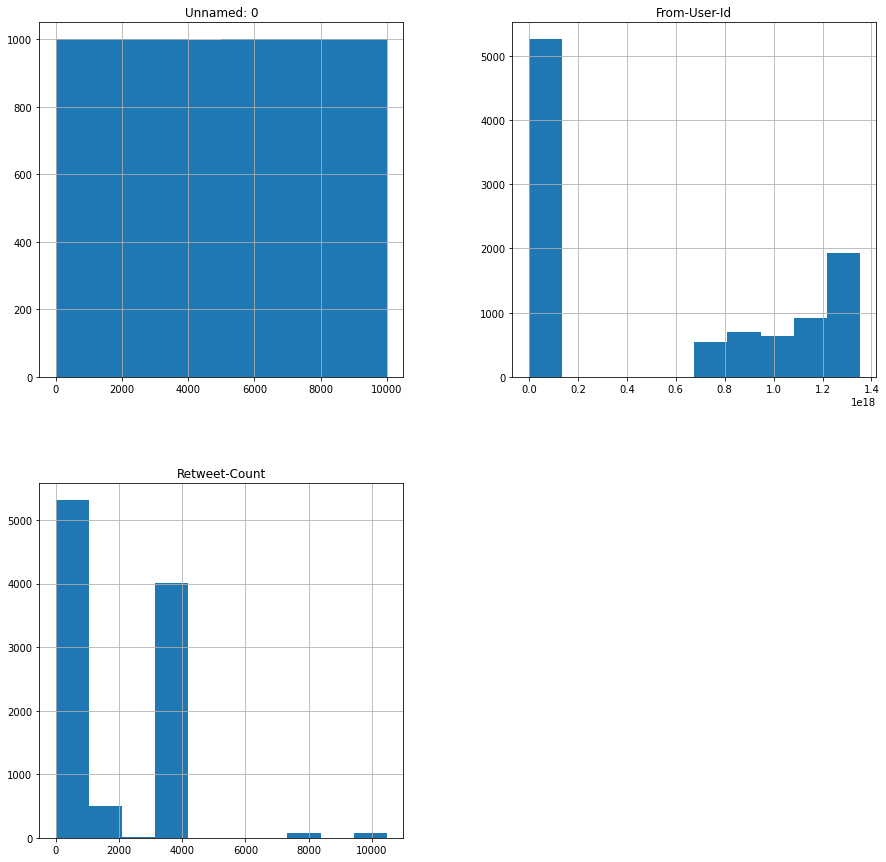

------------------------------

Printing top few element: 



,Unnamed: 0,Time,From-User,From-User-Id,Text,Retweet-Count
0,0,1/23/21 11:23 AM,Aditya Raj Kaul,44425241,"#BREAKING: India to send over 300,000 Covishie...",675.0
1,1,1/23/21 11:40 AM,Saket Gokhale,24857905,India cleared commercial exports of Covid-19 v...,762.0
2,2,1/22/21 6:12 PM,Adar Poonawalla,911182427782909952,Thank you Shri Uddhav Ji @CMOMaharashtra and @...,529.0
3,3,1/23/21 6:17 PM,??,2787411518,RT @abdulla_shahid: Maldives is happy to recei...,784.0
4,4,1/23/21 6:17 PM,Dr Vijay Chauthaiwale,75489786,RT @DrJankii: As per National Vaccination plan...,888.0


In [ ]:
df1 = pd.read_csv('/content/Covishield_tweets.csv')
print("The total number of Comments is:",len(df1))
print("------------------------------\n")
df1.info()

print("------------------------------\n")
# histograms
df1.hist(figsize=[15, 15])
plt.show()

print("------------------------------\n")
print("Printing top few element: \n")
df1.head()

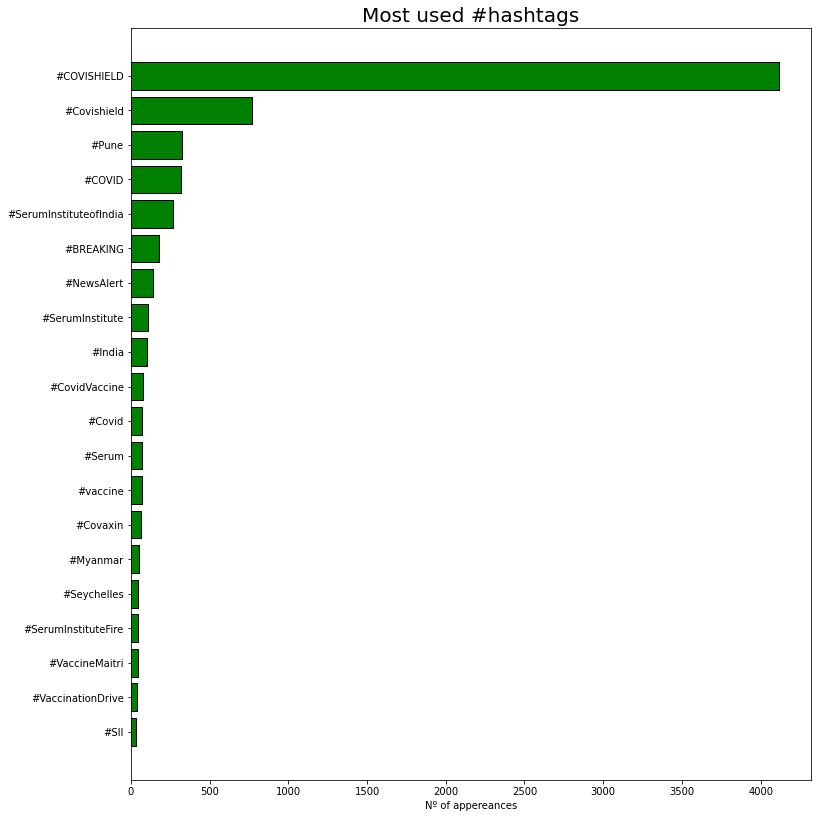

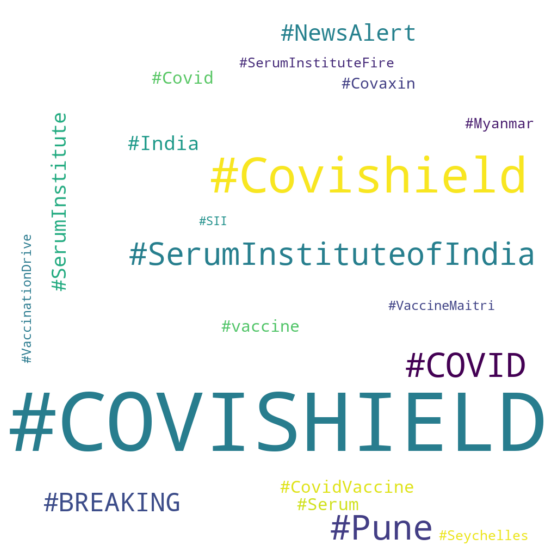

In [ ]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df1['Text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()


#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

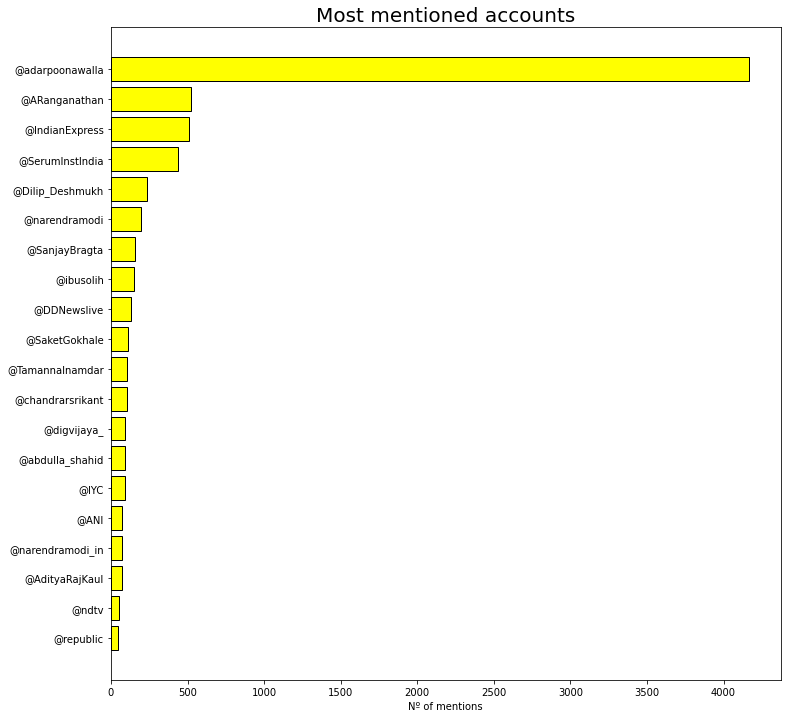

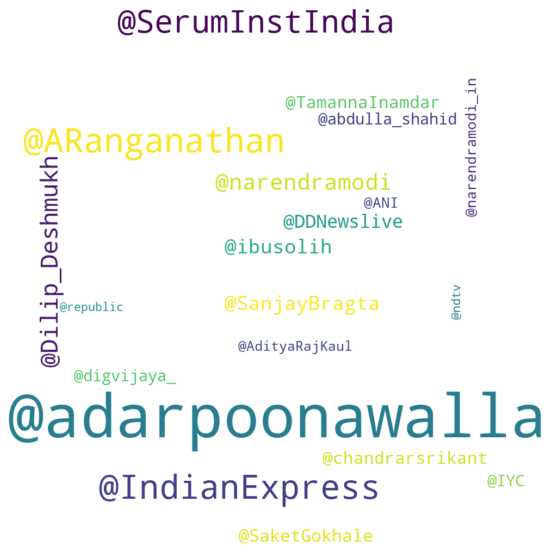

In [ ]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df1['Text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

#Create an ordered list of tuples with the most mentioned users and #the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

#plot the results
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()


#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

The total number of Comments is: 34768
------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34768 entries, 0 to 34767
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   post_id            34768 non-null  object
 1   post_author        34768 non-null  object
 2   post_date          34768 non-null  object
 3   post_title         34768 non-null  object
 4   post_score         34768 non-null  int64 
 5   post_permalink     34768 non-null  object
 6   post_url           34768 non-null  object
 7   comment_id         34768 non-null  object
 8   comment_author     34768 non-null  object
 9   comment_date       34768 non-null  object
 10  comment_parent_id  34768 non-null  object
 11  comment_edited     34768 non-null  object
 12  comment_score      34768 non-null  int64 
 13  comment_body       34768 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.7+ MB
-----------------

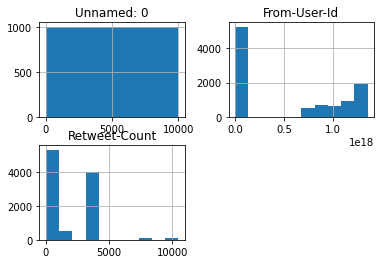

------------------------------

Printing top few element: 



,Unnamed: 0,Time,From-User,From-User-Id,Text,Retweet-Count
0,0,1/23/21 11:23 AM,Aditya Raj Kaul,44425241,"#BREAKING: India to send over 300,000 Covishie...",675.0
1,1,1/23/21 11:40 AM,Saket Gokhale,24857905,India cleared commercial exports of Covid-19 v...,762.0
2,2,1/22/21 6:12 PM,Adar Poonawalla,911182427782909952,Thank you Shri Uddhav Ji @CMOMaharashtra and @...,529.0
3,3,1/23/21 6:17 PM,??,2787411518,RT @abdulla_shahid: Maldives is happy to recei...,784.0
4,4,1/23/21 6:17 PM,Dr Vijay Chauthaiwale,75489786,RT @DrJankii: As per National Vaccination plan...,888.0


In [ ]:
df2=df = pd.read_csv('/content/comments.csv')
print("The total number of Comments is:",len(df2))
print("------------------------------\n")
df2.info()

print("------------------------------\n")
# histograms
df1.hist()
plt.show()

print("------------------------------\n")
print("Printing top few element: \n")
df1.head()

The total number of Comments is: 238
------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               238 non-null    int64  
 1   conversation_id  238 non-null    int64  
 2   created_at       238 non-null    object 
 3   date             238 non-null    object 
 4   time             238 non-null    object 
 5   timezone         238 non-null    int64  
 6   user_id          238 non-null    int64  
 7   username         238 non-null    object 
 8   name             238 non-null    object 
 9   place            0 non-null      float64
 10  tweet            238 non-null    object 
 11  language         238 non-null    object 
 12  mentions         238 non-null    object 
 13  urls             238 non-null    object 
 14  photos           238 non-null    object 
 15  replies_count    238 non-null    int64 

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


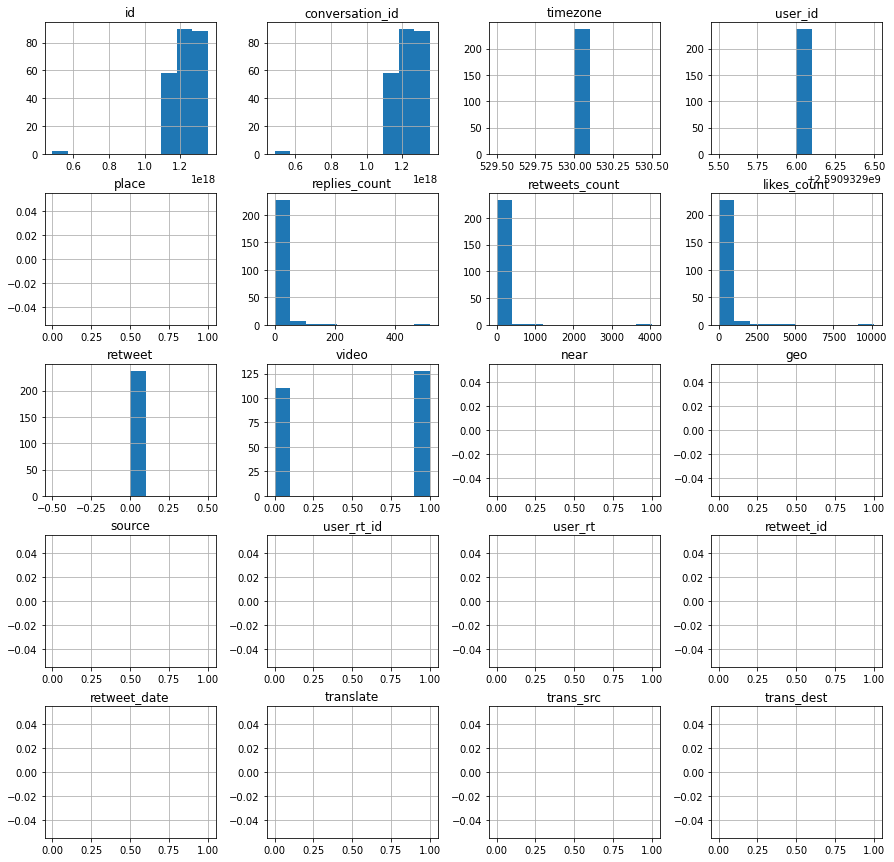

------------------------------

Printing top few element: 



,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1354321358931382272,1354321358931382272,2021-01-27 12:22:28 India Standard Time,2021-01-27,12:22:28,530,2590932906,bharatbiotech,BharatBiotech,NaN,Neutralization of UK-variant VUI-202012/01 wit...,en,[],['https://www.biorxiv.org/content/10.1101/2021...,['https://pbs.twimg.com/media/EsuD91GVkAInR2B....,43,335,1212,"['bharatbiotech', 'covaxin', 'biorxiv', 'covid...",[],https://twitter.com/BharatBiotech/status/13543...,False,NaN,1,https://pbs.twimg.com/media/EsuD91GVkAInR2B.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1352520350672760834,1352520350672760834,2021-01-22 13:05:54 India Standard Time,2021-01-22,13:05:54,530,2590932906,bharatbiotech,BharatBiotech,NaN,Proud to announce the publication of COVAXINᵀᴹ...,en,"[{'screen_name': 'thelancetinfdis', 'name': 't...",['https://www.thelancet.com/journals/laninf/ar...,[],12,82,284,"['bharatbiotech', 'lancet', 'covaxin', 'sarsco...",[],https://twitter.com/BharatBiotech/status/13525...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1350313022795911169,1350313022795911169,2021-01-16 10:54:46 India Standard Time,2021-01-16,10:54:46,530,2590932906,bharatbiotech,BharatBiotech,NaN,Researchers in India have theorized that whol...,en,"[{'screen_name': 'naturenews', 'name': 'nature...",['https://www.nature.com/articles/d41586-021-0...,[],19,102,423,"['covaxin', 'bharabiotech', 'icmr', 'naturenew...",[],https://twitter.com/BharatBiotech/status/13503...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1350117100862332929,1350117100862332929,2021-01-15 21:56:15 India Standard Time,2021-01-15,21:56:15,530,2590932906,bharatbiotech,BharatBiotech,NaN,A #Vaccine Made from Coronaviruses - #Covaxin ...,en,"[{'screen_name': 'nytimes', 'name': 'the new y...",['https://www.nytimes.com/interactive/2021/hea...,[],19,111,394,"['vaccine', 'covaxin', 'coronavirus', 'bharatb...",[],https://twitter.com/BharatBiotech/status/13501...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1349286213392351233,1349286213392351233,2021-01-13 14:54:36 India Standard Time,2021-01-13,14:54:36,530,2590932906,bharatbiotech,BharatBiotech,NaN,A moment of pride and accomplishment as the fi...,en,[],[],[],60,241,1300,"['bharatbiotech', 'covaxin', 'atmanirbharbhara...",[],https://twitter.com/BharatBiotech/status/13492...,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/13492...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df3=pd.read_csv("/content/BharatBioTech - Covaxin.csv")
print("The total number of Comments is:",len(df3))
print("------------------------------\n")
df3.info()

print("------------------------------\n")
# histograms
df3.hist(figsize=[15, 15])
plt.show()

print("------------------------------\n")
print("Printing top few element: \n")
df3.head()

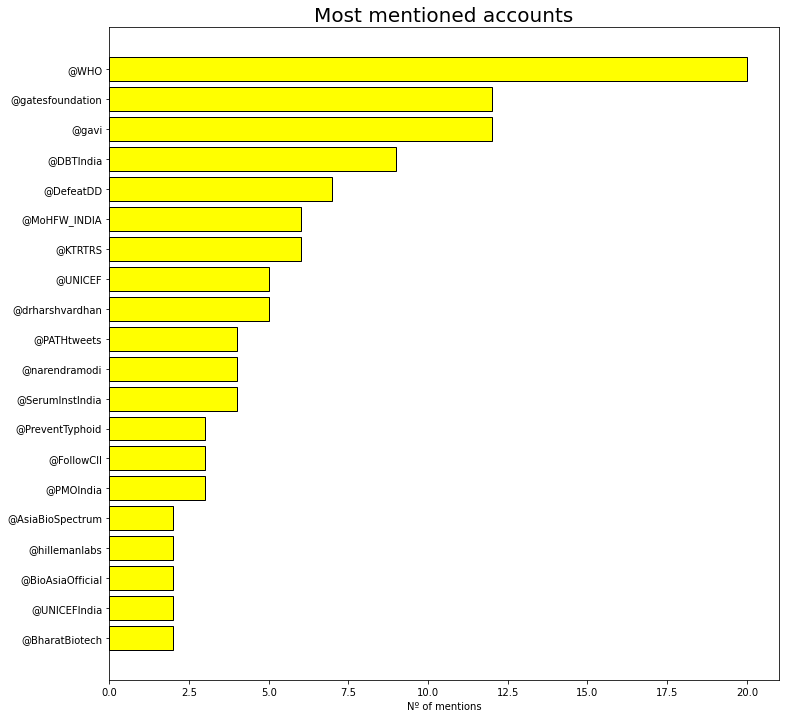

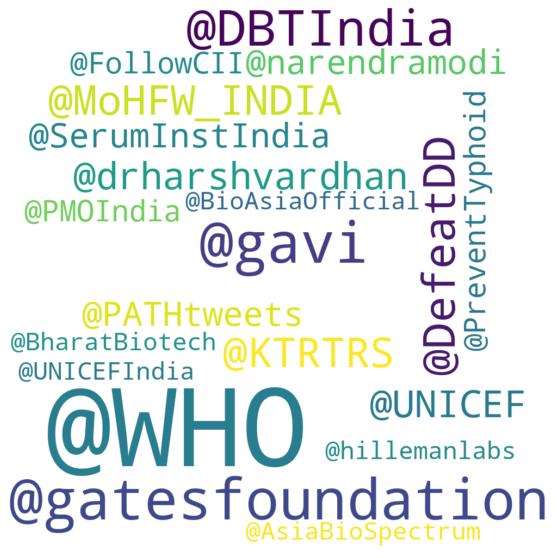

In [ ]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df3['tweet'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

#Create an ordered list of tuples with the most mentioned users and #the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

#plot the results
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()


#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

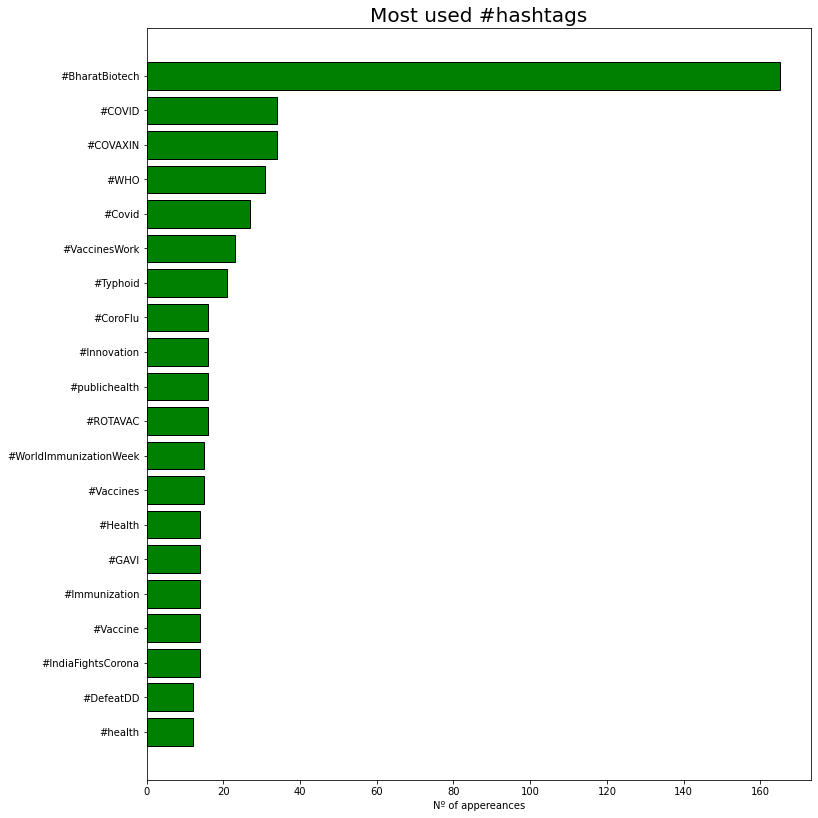

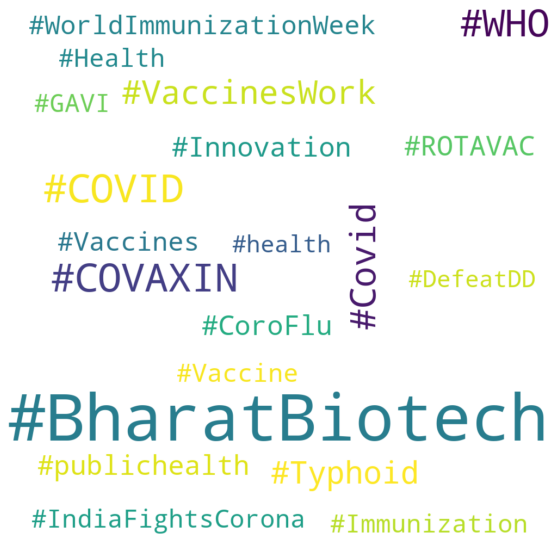

In [ ]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df3['tweet'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()


#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [ ]:
df4=pd.read_csv("/content/vaccination_tweets.csv")
print("The total number of Comments is:",len(df4))
print("------------------------------\n")
df4.info()

print("------------------------------\n")
# histograms
#df4.hist()
#plt.show()

print("------------------------------\n")
print("Printing top few element: \n")
df4.head()

The total number of Comments is: 5976
------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976 entries, 0 to 5975
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5976 non-null   int64 
 1   user_name         5976 non-null   object
 2   user_location     4738 non-null   object
 3   user_description  5598 non-null   object
 4   user_created      5976 non-null   object
 5   user_followers    5976 non-null   int64 
 6   user_friends      5976 non-null   int64 
 7   user_favourites   5976 non-null   int64 
 8   user_verified     5976 non-null   bool  
 9   date              5976 non-null   object
 10  text              5976 non-null   object
 11  hashtags          4483 non-null   object
 12  source            5975 non-null   object
 13  retweets          5976 non-null   int64 
 14  favorites         5976 non-null   int64 
 15  is_retweet        5976 non-null   bo

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df4['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()


#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [ ]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df4['text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

#Create an ordered list of tuples with the most mentioned users and #the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

#plot the results
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()


#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

The total number of Comments is: 238
------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   username        238 non-null    object
 1   name            238 non-null    object
 2   tweet           238 non-null    object
 3   language        238 non-null    object
 4   replies_count   238 non-null    int64 
 5   retweets_count  238 non-null    int64 
 6   likes_count     238 non-null    int64 
 7   hashtags        238 non-null    object
dtypes: int64(3), object(5)
memory usage: 15.0+ KB
------------------------------



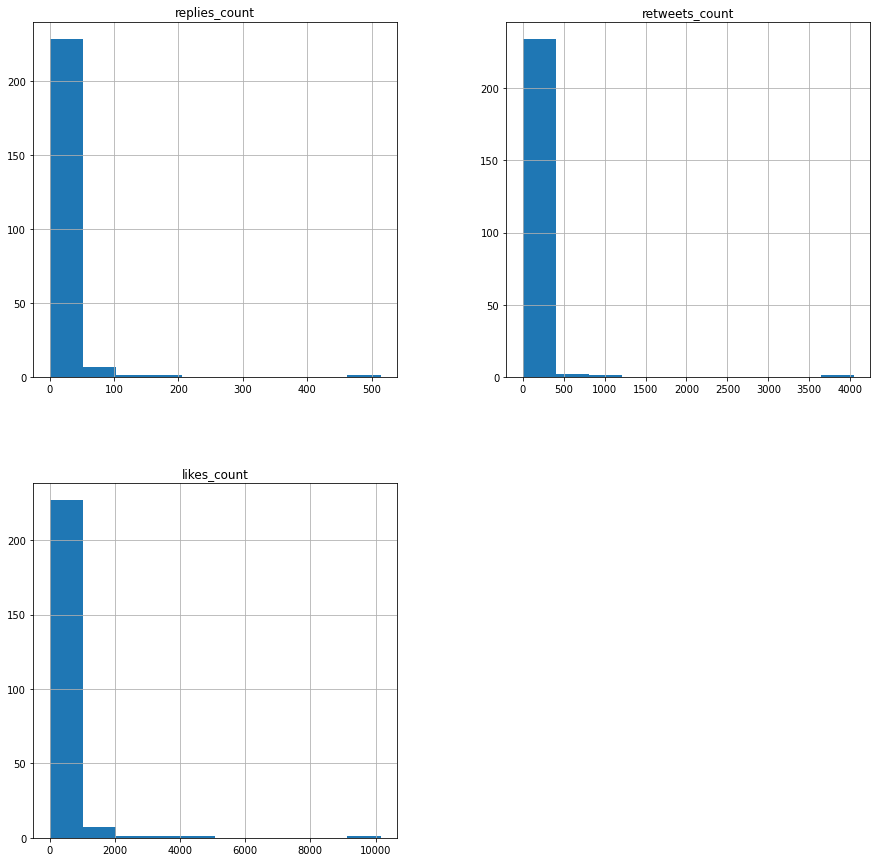

------------------------------

Printing top few element: 



,username,name,tweet,language,replies_count,retweets_count,likes_count,hashtags
0,bharatbiotech,BharatBiotech,Neutralization of UK-variant VUI-202012/01 wit...,en,43,335,1212,"['bharatbiotech', 'covaxin', 'biorxiv', 'covid..."
1,bharatbiotech,BharatBiotech,Proud to announce the publication of COVAXINᵀᴹ...,en,12,82,284,"['bharatbiotech', 'lancet', 'covaxin', 'sarsco..."
2,bharatbiotech,BharatBiotech,Researchers in India have theorized that whol...,en,19,102,423,"['covaxin', 'bharabiotech', 'icmr', 'naturenew..."
3,bharatbiotech,BharatBiotech,A #Vaccine Made from Coronaviruses - #Covaxin ...,en,19,111,394,"['vaccine', 'covaxin', 'coronavirus', 'bharatb..."
4,bharatbiotech,BharatBiotech,A moment of pride and accomplishment as the fi...,en,60,241,1300,"['bharatbiotech', 'covaxin', 'atmanirbharbhara..."


In [ ]:
df5=pd.read_csv("/content/BharatBioTech-Refined - Covaxin.csv")
print("The total number of Comments is:",len(df5))
print("------------------------------\n")
df5.info()

print("------------------------------\n")
# histograms
df5.hist(figsize=[15, 15])
plt.show()

print("------------------------------\n")
print("Printing top few element: \n")
df5.head()

In [ ]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df5['tweet'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()


#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [ ]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df5['tweett'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

#Create an ordered list of tuples with the most mentioned users and #the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

#plot the results
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()


#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

The total number of Comments is: 238
------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               238 non-null    int64  
 1   conversation_id  238 non-null    int64  
 2   created_at       238 non-null    object 
 3   date             238 non-null    object 
 4   time             238 non-null    object 
 5   timezone         238 non-null    int64  
 6   user_id          238 non-null    int64  
 7   username         238 non-null    object 
 8   name             238 non-null    object 
 9   place            0 non-null      float64
 10  tweet            238 non-null    object 
 11  language         238 non-null    object 
 12  mentions         238 non-null    object 
 13  urls             238 non-null    object 
 14  photos           238 non-null    object 
 15  replies_count    238 non-null    int64 

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


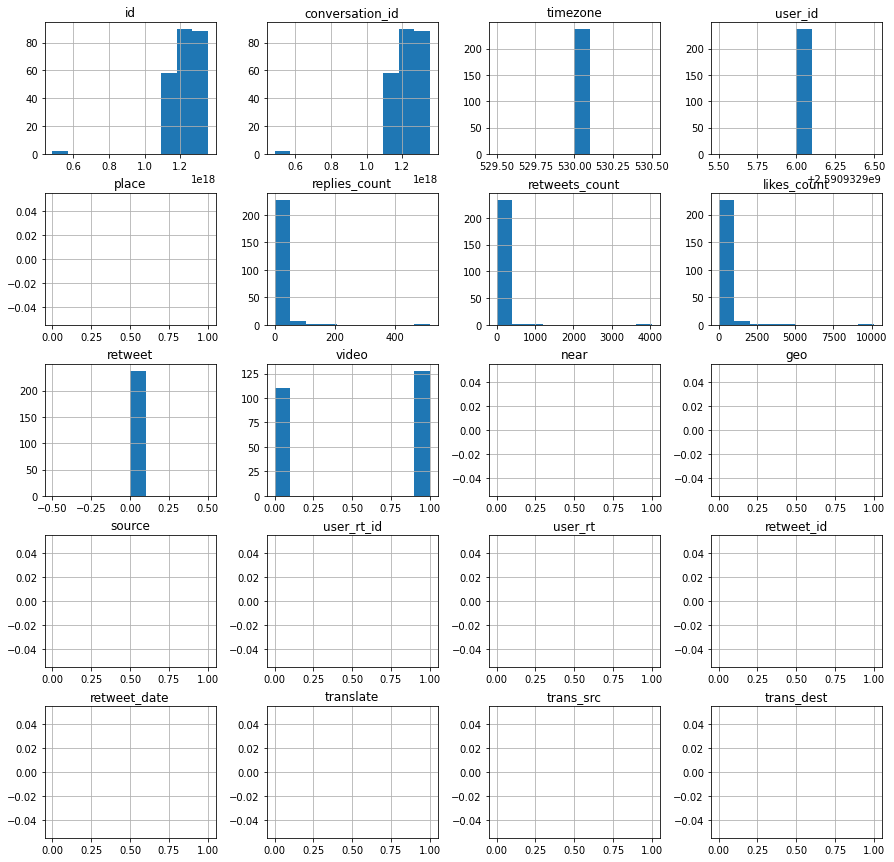

------------------------------

Printing top few element: 



,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1354321358931382272,1354321358931382272,2021-01-27 12:22:28 India Standard Time,2021-01-27,12:22:28,530,2590932906,bharatbiotech,BharatBiotech,NaN,Neutralization of UK-variant VUI-202012/01 wit...,en,[],['https://www.biorxiv.org/content/10.1101/2021...,['https://pbs.twimg.com/media/EsuD91GVkAInR2B....,43,335,1212,"['bharatbiotech', 'covaxin', 'biorxiv', 'covid...",[],https://twitter.com/BharatBiotech/status/13543...,False,NaN,1,https://pbs.twimg.com/media/EsuD91GVkAInR2B.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1352520350672760834,1352520350672760834,2021-01-22 13:05:54 India Standard Time,2021-01-22,13:05:54,530,2590932906,bharatbiotech,BharatBiotech,NaN,Proud to announce the publication of COVAXINᵀᴹ...,en,"[{'screen_name': 'thelancetinfdis', 'name': 't...",['https://www.thelancet.com/journals/laninf/ar...,[],12,82,284,"['bharatbiotech', 'lancet', 'covaxin', 'sarsco...",[],https://twitter.com/BharatBiotech/status/13525...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1350313022795911169,1350313022795911169,2021-01-16 10:54:46 India Standard Time,2021-01-16,10:54:46,530,2590932906,bharatbiotech,BharatBiotech,NaN,Researchers in India have theorized that whol...,en,"[{'screen_name': 'naturenews', 'name': 'nature...",['https://www.nature.com/articles/d41586-021-0...,[],19,102,423,"['covaxin', 'bharabiotech', 'icmr', 'naturenew...",[],https://twitter.com/BharatBiotech/status/13503...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1350117100862332929,1350117100862332929,2021-01-15 21:56:15 India Standard Time,2021-01-15,21:56:15,530,2590932906,bharatbiotech,BharatBiotech,NaN,A #Vaccine Made from Coronaviruses - #Covaxin ...,en,"[{'screen_name': 'nytimes', 'name': 'the new y...",['https://www.nytimes.com/interactive/2021/hea...,[],19,111,394,"['vaccine', 'covaxin', 'coronavirus', 'bharatb...",[],https://twitter.com/BharatBiotech/status/13501...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1349286213392351233,1349286213392351233,2021-01-13 14:54:36 India Standard Time,2021-01-13,14:54:36,530,2590932906,bharatbiotech,BharatBiotech,NaN,A moment of pride and accomplishment as the fi...,en,[],[],[],60,241,1300,"['bharatbiotech', 'covaxin', 'atmanirbharbhara...",[],https://twitter.com/BharatBiotech/status/13492...,False,NaN,1,https://pbs.twimg.com/ext_tw_video_thumb/13492...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
df6=pd.read_csv("/content/BharatBioTech - Covaxin.csv")
print("The total number of Comments is:",len(df6))
print("------------------------------\n")
df6.info()

print("------------------------------\n")
# histograms
df6.hist(figsize=[15, 15])
plt.show()

print("------------------------------\n")
print("Printing top few element: \n")
df6.head()

In [ ]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df6['tweet'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()


#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [ ]:
#Now we will do the same with the mentions:
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(df6['tweet'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

#Create an ordered list of tuples with the most mentioned users and #the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 20 top mentioned users to plot and separate the previous #list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:20]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])

#plot the results
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'yellow', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Nº of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()


#Make a wordcloud representation for the most mentioned accounts too
mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [ ]:
print("Thanks")

Thanks
